In [1]:
using Pkg, Revise
Pkg.activate("..")
using Clapeyron, PyCall
import PyPlot; const plt = PyPlot

  Activating new project at `C:\Users\sutha\OneDrive\Documents\Kuliah\Skripsi\ClapeyronThermo Clapeyron.jl master examples`


PyPlot

In [2]:
using Clapeyron

glycine_data = """Clapeyron Database File
My SolidHfus Parameters
species,Mw,Tm,Hfus
glycine,75.0666,578,22000
"""

like_parameter = """Clapeyron Database File,,,,,,,,,,
SAFTgammaMie Like Parameters [csvtype = like,grouptype = SAFTgammaMie]
species,Mw,vst,S,lambda_r,lambda_a,sigma,epsilon,n_H,n_e1,n_e2
H2O,18.01528,1,1,17.02,6,3.0063,266.68,2,2,0
COOH,45.02,1,0.55593,8,6,4.3331,405.78,1,2,2
NH2,16.02,1,0.79675,10.254,6,3.2477,284.78,2,1,0
CH3,15.04,1,0.57255,15.05,6,4.0772,256.77,0,0,0
CH2,14.03,1,0.22932,19.871,6,4.8801,473.39,0,0,0
CH,13.02,1,0.0721,8,6,5.295,95.621,0,0,0
CH2OH,31.034,2,0.58538,22.699,6,3.4054,407.22,1,2,0
CHOH,31.02,2,0.18963,18.185,6,4.5381,599.66,1,2,0
CONH,44.03,2,0.73764,29.8393,6,2.9482,156.1242,1,2,0
COO-,44.009,1,0.55593,8,6,4.3331,21.264,0,4,0
NH3+,17.031,1,0.79675,10.254,6,3.2477,48.3,3,0,0
H3O+,19.025,1,1,17.02,6,3.0063,68.19,3,0,0
OH-,17.007,1,1,17.02,6,2.46,170.24,0,3,0
Na+,22.99,1,1,12,6,2.32,31.711,0,0,0
Cl-,35.45,1,1,12,6,3.34,113.77,0,0,0

"""

unlike_parameter = """Clapeyron Database File,,,
SAFTgammaMie Unlike Parameters [csvtype = unlike,grouptype = SAFTgammaMie]
species1,species2,epsilon,lambda_r
H2O,COOH,289.76,
H2O,NH2,358.55,
H2O,CH3,358.18,100
H2O,CH2,423.63,100
H2O,CH,275.75,
H2O,CH2OH,353.37,
H2O,CHOH,479.16,
H2O,COO-,171.61,
H2O,NH3+,450.21,
H2O,H3O+,391.04,
H2O,OH-,134.41,
H2O,CONH,379.59007329,
H2O,Na+,539.68,
H2O,Cl-,95.406,
COOH,NH2,285,
COOH,CH3,255.99,
COOH,CH2,413.74,
COOH,CH,504.99,
COOH,CH2OH,488.18,
COOH,CHOH,1154.34,50
COOH,COO-,405.78,8
COOH,NH3+,388.58,
COOH,H3O+,,
COOH,OH-,,
COOH,CONH,670.039574263,
COOH,Na+,,
COOH,Cl-,,
NH2,CH3,244.15,
NH2,CH2,348.39,
NH2,CH,278.259,
NH2,CH2OH,528.21,52.305
NH2,CHOH,415.535746703,10.6429310725
NH2,COO-,,
NH2,NH3+,284.78,
NH2,H3O+,,
NH2,OH-,,
NH2,CONH,150.77,
NH2,Na+,,
NH2,Cl-,,
CH3,CH2,350.77,
CH3,CH,387.48,
CH3,CH2OH,333.2,
CH3,CHOH,479.38,
CH3,COO-,255.99,
CH3,NH3+,244.15,
CH3,H3O+,,
CH3,Na+,,
CH3,Cl-,,
CH3,OH-,,
CH3,CONH,430.6028,
CH2,CH,506.21,
CH2,CH2OH,423.17,
CH2,CHOH,517.64,
CH2,COO-,780.24,
CH2,NH3+,348.39,
CH2,H3O+,,
CH2,OH-,,
CH2,CONH,315,
CH2,Na+,,
CH2,Cl-,,
CH,CH2OH,329.22,
CH,CHOH,0,
CH,COO-,504.99,
CH,NH3+,151.01,
CH,H3O+,,
CH,OH-,,
CH,CONH,,
CH,Na+,,
CH,Cl-,,
CH2OH,CHOH,389.23,
CH2OH,CONH,,
COO-,NH3+,26.33,
COO-,H3O+,27.74,
COO-,OH-,44.52,
COO-,Na+,9.9125,
COO-,Cl-,21.265,
NH3+,H3O+,56.958,
NH3+,OH-,62.238,
NH3+,Na+,,
NH3+,Cl-,65.2566,
H3O+,OH-,66.439,
H3O+,Na+,37.48,
H3O+,Cl-,70.552,
OH-,Na+,27.898,
OH-,Cl-,123.21,
Na+,Cl-,27.938,
"""

assoc_parameter = """Clapeyron Database File,,,,,
SAFTgammaMie Assoc Parameters [csvtype = assoc,grouptype = SAFTgammaMie]
species1,site1,species2,site2,epsilon_assoc,bondvol
H2O,H,H2O,e1,1985.4,1.0169E-28
H2O,e1,COOH,H,2567.7,2.7009E-28
H2O,H,COOH,e1,1451.8,2.8089E-28
H2O,H,COOH,e2,1252.6,1.5098E-28
H2O,H,NH2,e1,1460,1.796E-28
H2O,e1,NH2,H,1988.3,5.5824E-29
H2O,H,CH2OH,e1,2153.2,1.474E-28
H2O,e1,CH2OH,H,621.68,4.25E-28
H2O,H,CHOH,e1,2140.9,1.9478E-29
H2O,e1,CHOH,H,2289.1,6.3813E-29
H2O,H,COO-,e1,802.21,5.2555E-29
H2O,e1,NH3+,H,2016.6,4.9397E-29
H2O,e1,H3O+,H,1985.4,1.0169E-28
H2O,H,OH-,e1,1492,7.6411E-29
H2O,H,CONH,e1,1986.15540678,2.36587435076E-28
H2O,e1,CONH,H,3061.48979745,1.30807183315E-28
COOH,H,COOH,H,6427.9,8.062E-31
COOH,H,NH2,e1,4000,1E-28
COOH,e1,NH2,H,1446.624,1E-28
COOH,e2,NH2,H,1220.143,1E-28
COOH,H,CH2OH,e1,3238.4,3.605E-29
COOH,e1,CH2OH,H,1062.1,2.1067E-28
COOH,e2,CH2OH,H,997.89,2.2707E-28
COOH,H,CHOH,e1,4000,1.083438E-29
COOH,e1,CHOH,H,305.01688,1E-30
COOH,e2,CHOH,H,319.86784,1E-31
COOH,e1,NH3+,H,334.08,1.35E-29
COOH,e2,NH3+,H,366.54,9.99E-27
COOH,e1,H3O+,H,1451.8,2.8089E-28
COOH,e2,H3O+,H,1252.6,1.5098E-28
COOH,H,OH-,e1,2036,2.1416E-28
COOH,H,CONH,e1,2487.22158057,2.42724804648E-28
COOH,e1,CONH,H,1723.46443955,4.61802409928E-28
COOH,e2,CONH,H,1723.46443955,4.61802409928E-28
NH2,e1,NH2,H,1070.8,9.5225E-29
NH2,H,CH2OH,e1,629.88,3.4608E-28
NH2,e1,CH2OH,H,2403.8,2.6192E-29
NH2,H,CHOH,e1,1524.85714625,1.032195E-28
NH2,e1,CHOH,H,1470.33396066,3.03470375E-28
NH2,H,COO-,e1,1220.143,1E-28
NH2,e1,NH3+,H,1070.8,9.5225E-29
NH2,e1,H3O+,H,1460,1.796E-28
NH2,H,OH-,e1,1511.4,4.2436E-29
NH2,e1,CONH,H,2807.1,1.2283E-28
NH2,H,CONH,e1,1687.6,1.2283E-28
CH2OH,H,CH2OH,e1,2097.9,6.2309E-29
CH2OH,H,CHOH,e1,2500,1.0444E-29
CH2OH,e1,CHOH,H,1464.1,5.9155E-28
CH2OH,H,CONH,e1,2583.57804,1.0183737E-28
CH2OH,e1,CONH,H,2583.57804,1.0183737E-28
CHOH,H,CHOH,e1,2480.6,8.474E-30
COO-,e1,NH3+,H,1767,1.35E-29
COO-,e1,H3O+,H,802.21,5.2555E-29
NH3+,H,OH-,e1,1988.3,5.5824E-29
H3O+,H,OH-,e1,1492,7.6411E-29
CONH,H,CONH,e1,3181.6938,1.55314E-28
"""

components = [("water", ["H2O"=>1]), ("glycine", ["NH2"=>1, "CH2"=>1, "COOH"=>1])]

model = CompositeModel(components;
                       fluid = SAFTgammaMie,
                       solid = SolidHfus,
                       solid_userlocations = [glycine_data],
                       fluid_userlocations = [like_parameter,unlike_parameter,assoc_parameter])

Composite Model with 2 components:
 "water"
 "glycine"
Solid Model: SolidHfus("water", "glycine")
Fluid Model: SAFTgammaMie{BasicIdeal, Float64}("water", "glycine")

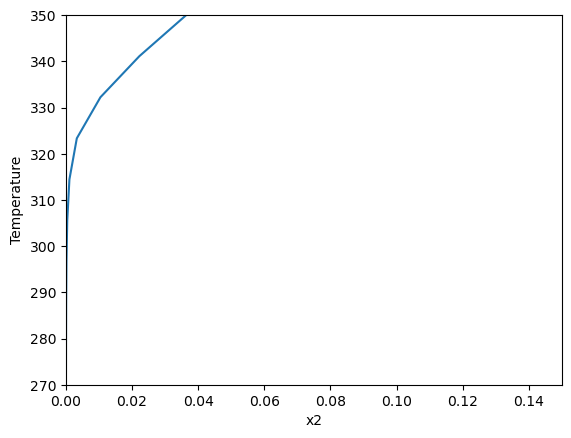

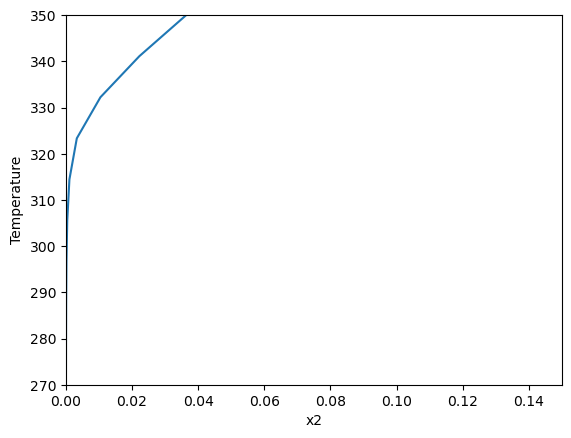

In [3]:
using Clapeyron

T = LinRange(270.,350.,10)
p = 100000 

s = zeros(length(T))

for i in 1:length(T)
    s[i] = sle_solubility(model,p,T[i],[1.,1.];solute=["glycine"])[2]
end

plt.clf()
plt.plot(s,T)
plt.xlabel("x2")
plt.ylabel("Temperature")
plt.xlim(0,0.15)
plt.ylim(270,350)
display(plt.gcf())